In [1]:
import sys
import os
sys.path.insert(0, "../") # uncomment to work with local copy
from electrostaticsfenics import *
output_folder = 'results/'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [2]:
simulation_input = {
    'total_width' : .080,
    'layers' : [
        {'index' : 1, 'thickness' : 0.2850,},
        {'index' : 2, 'thickness' : 0.0130,},
        {'index' : 3, 'thickness' : 0.0035,}, 
        {'index' : 4, 'thickness' : 0.0060,}, 
        {'index' : 5, 'thickness' : 0.1000,}
        ],
    'holes' :  [
        {'index' : 6, 'layer' : 2, 'x1' : .060, 'x2' : .075, 'material' : 'conductor'}
        ], 
    'sheets' : [
        {'index' : 7, 'interface' : (np.nan, 1),},
        {'index' : 8, 'interface' : (3,4),}
        ],
    'resolution' : 50,
    'refinement_region' : [(0.285, 0.3075)]
    }

In [3]:
geometry = Geometry.from_layers(**simulation_input)

################################Geometry################################
Period = 0.08
1 : Layer z1 = 0.0, z2 = 0.285, thickness = 0.285
2 : Layer z1 = 0.285, z2 = 0.298, thickness = 0.013
3 : Layer z1 = 0.298, z2 = 0.3015, thickness = 0.0035
4 : Layer z1 = 0.3015, z2 = 0.3075, thickness = 0.006
5 : Layer z1 = 0.3075, z2 = 0.4075, thickness = 0.1
6 : Hole in layer 2 , center = 0.0675 , width = 0.015, 
                    z1 = 0.285,  z2 = 0.298, material = conductor
7 : Sheet z = 0.0
8 : Sheet z = 0.3015


In [4]:
geometry.check_dimensions()

Total volume = 0.032404999999999844
Total area = 1.0309999999999975


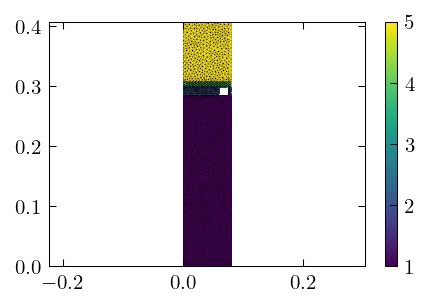

In [5]:
geometry.plot_subdomains()
plt.colorbar()
plt.savefig(output_folder + 'rest.pdf')

In [6]:
epsilon = Matrix_Expression({
                            1: [[2.5,0],[0,2.5]], 
                            2: [[1.,0],[0,1]],
                            3: [[3,0],[0,1]],
                            4: [[3,0],[0,5]],
                            5: [[1,0],[0,1]],
                            }, 
                            dimension = 2, 
                            marker = geometry.subdomain_marker, 
                            scalar = False)

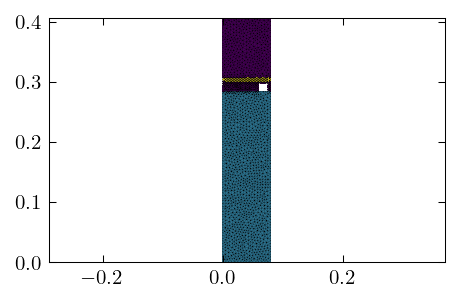

In [7]:
epsilon.plot(1,1)
plt.savefig(output_folder + 'eps.pdf')

In [12]:
problem = Problem.electrostatic_problem(geometry = geometry,epsilon = epsilon,contacts = [6,7,8],biases = [1,0.,0.])

In [13]:
problem.solve()

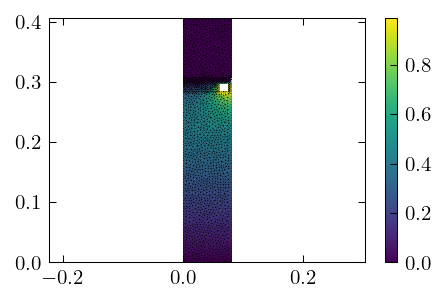

In [14]:
problem.plot_field(0)
plt.axis('equal')
plt.colorbar()

In [11]:
problem.response_matrix

array([[[[-0.57116922,  0.57116922]],

        [[ 0.69008397, -0.69008397]]]])

In [12]:
ff = geometry.contacts_marker